# Gender classification from face image data

## Imports

In [4]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from random import shuffle
from sklearn.decomposition import PCA
from sklearn import decomposition
import pickle

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from time import time

## Testing

In [5]:
directory = "original images"
categories = ["Female", "Male"]

In [3]:
img_size = 64

data = []

for category in categories:
    folder = os.path.join(directory, category)
    label = categories.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr, (img_size, img_size))
        data.append([img_arr, label])

KeyboardInterrupt: 

In [ ]:
shuffle(data)

In [ ]:
X = []
y = []

for features, labels in data:
    X.append(features)
    y.append(labels)

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X.shape

In [ ]:
nsamples, nx, ny, nz = X.shape
faces_reshape = X.reshape((nsamples,nx*ny*nz))

In [ ]:
faces_reshape.shape

## Loading in the data

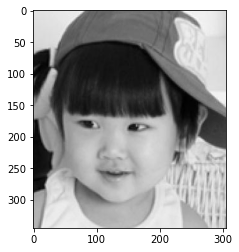

In [2]:
directory = "original images"
categories = ["Female", "Male"]

for category in categories:
    path = os.path.join(directory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break
       


### Image data

In [7]:
print(img_array.shape)

(345, 306)


### Shape

In [8]:
print(img_array.shape)

(345, 306)


### Resize Images & Grayscale

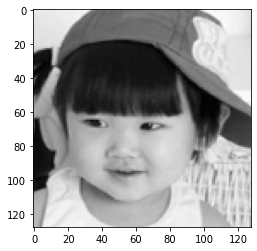

In [4]:

new_size = cv2.resize(img_array, (image_size))
plt.imshow(new_size, cmap= 'gray')
plt.show()

## Create Training Data and Assign Categories

In [5]:
training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(directory, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            new_size = cv2.resize(img_array, (image_size))
            training_data.append([new_size, class_num])
create_training_data()

In [6]:
#training_data[0].size

AttributeError: 'list' object has no attribute 'size'

### Shuffle data

In [61]:
shuffle(training_data)

In [62]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
0
0
0
0
0
0
0


### Create feature and label sets

In [63]:
X = []
y = []

In [64]:
# Append features to X and labels to y
for features, label in training_data:
    X.append(features)
    y.append(label)

In [38]:
# X = np.array(X)
# X = X.reshape

In [39]:
# n_samples, n_features = len(X), X[0].size
# print("Dataset consists of %d faces" % n_samples)
# print("Each image has %d features" % n_features)

In [40]:
# -1 to catch any number of features, shape of the data, 1 for grayscale
#X = np.array(X).reshape(-1, image_size[0], image_size[1], 1)

In [65]:
X = np.array(X)
y = np.array(y)

In [66]:
nsamples, nx, ny = X.shape
X = X.reshape((nsamples,nx*ny))

In [67]:
X.shape

(13322, 16384)

In [68]:
n_samples, n_features = X.shape
print("Dataset consists of %d faces" % n_samples)
print("Each image has %d features" % n_features)

Dataset consists of 13322 faces
Each image has 16384 features


### Alternative attempt

In [ ]:
# X = np.array([])
# y = []

In [ ]:
# for features in training_data:
#     np.append(X, features, axis=0)

In [ ]:
# X.shape

In [ ]:
# print(training_data[0])

### Pickle save

In [69]:

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [5]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

## Visualisations

In [6]:
image_size = (128, 128)

n_row, n_col = 2, 3
def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_size), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

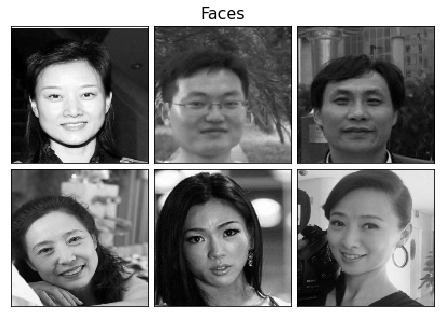

In [7]:
plot_gallery("Faces", X[:6])
plt.savefig("Faces")

In [12]:
X = X/255.0

In [13]:
faces_centered = X - X.mean(axis=0)

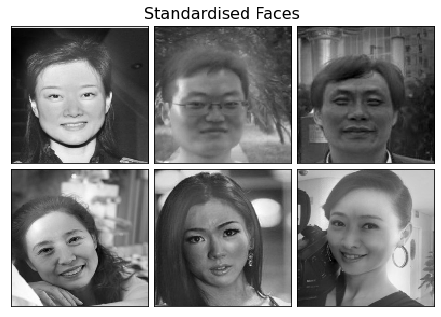

In [14]:
plot_gallery("Standardised Faces", faces_centered[:6])
plt.savefig("StandFaces")

In [9]:
faces_centered.shape

(13322, 16384)

In [10]:
len(faces_centered[1])

16384

### Preparing without PCA

In [8]:
df_faces_no_pca = pd.DataFrame(np.concatenate(((faces_centered), y[:, np.newaxis]), axis=1))

In [9]:
df_faces_no_pca.head(2)

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,16384
0,0.426396,0.426945,0.427415,0.42724,0.427479,0.428104,0.427911,0.427109,0.427260,0.427682,...,0.094320,0.128038,0.164891,0.147358,0.129970,0.182504,0.180447,0.000852,-0.204941,0.0
1,-0.248114,-0.310310,-0.329447,-0.32178,-0.313697,-0.297386,-0.289736,-0.298382,-0.309995,-0.309573,...,-0.054699,-0.060198,-0.058638,-0.064407,-0.066108,-0.068476,-0.054847,-0.050128,-0.040235,1.0


### Eigenfaces

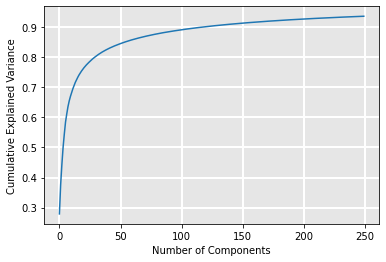

In [37]:

pca = PCA(n_components=250).fit(faces_centered)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');
plt.grid(True, color='w', linestyle='-', linewidth=2)
plt.gca().patch.set_facecolor('0.9')
plt.savefig("numberofcomp")

In [19]:
n_PCA_feature = 2

In [20]:
pca = PCA(n_components = n_PCA_feature)

In [21]:
faces_centered.shape

(13322, 16384)

### Converting to pandas

In [22]:
df_faces = pd.DataFrame(np.concatenate((pca.fit_transform(faces_centered), y[:, np.newaxis]), axis=1))

In [23]:
df_faces.iloc[:,len(df_faces.columns)-1]

0        0.0
1        1.0
2        1.0
3        0.0
4        0.0
        ... 
13317    1.0
13318    0.0
13319    0.0
13320    1.0
13321    1.0
Name: 2, Length: 13322, dtype: float64

In [17]:
# print(np.cumsum(pca.explained_variance_ratio_))

[0.27916599 0.37576812 0.44246336 0.49996626 0.54446623 0.58441201
 0.61122307 0.63541534 0.65424038 0.66932    0.68267861 0.69494707
 0.70605117 0.71615103 0.72473227 0.73295706 0.74048176 0.74718434
 0.75331841 0.75911665]


In [24]:
eigen_faces = pca.components_
eigen_faces.shape

(2, 16384)

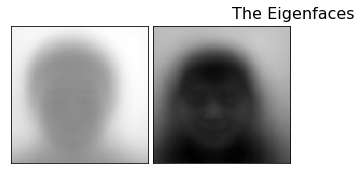

In [25]:
plot_gallery("The Eigenfaces", eigen_faces[:8], n_col=4, n_row=2)
plt.savefig("eigenface")

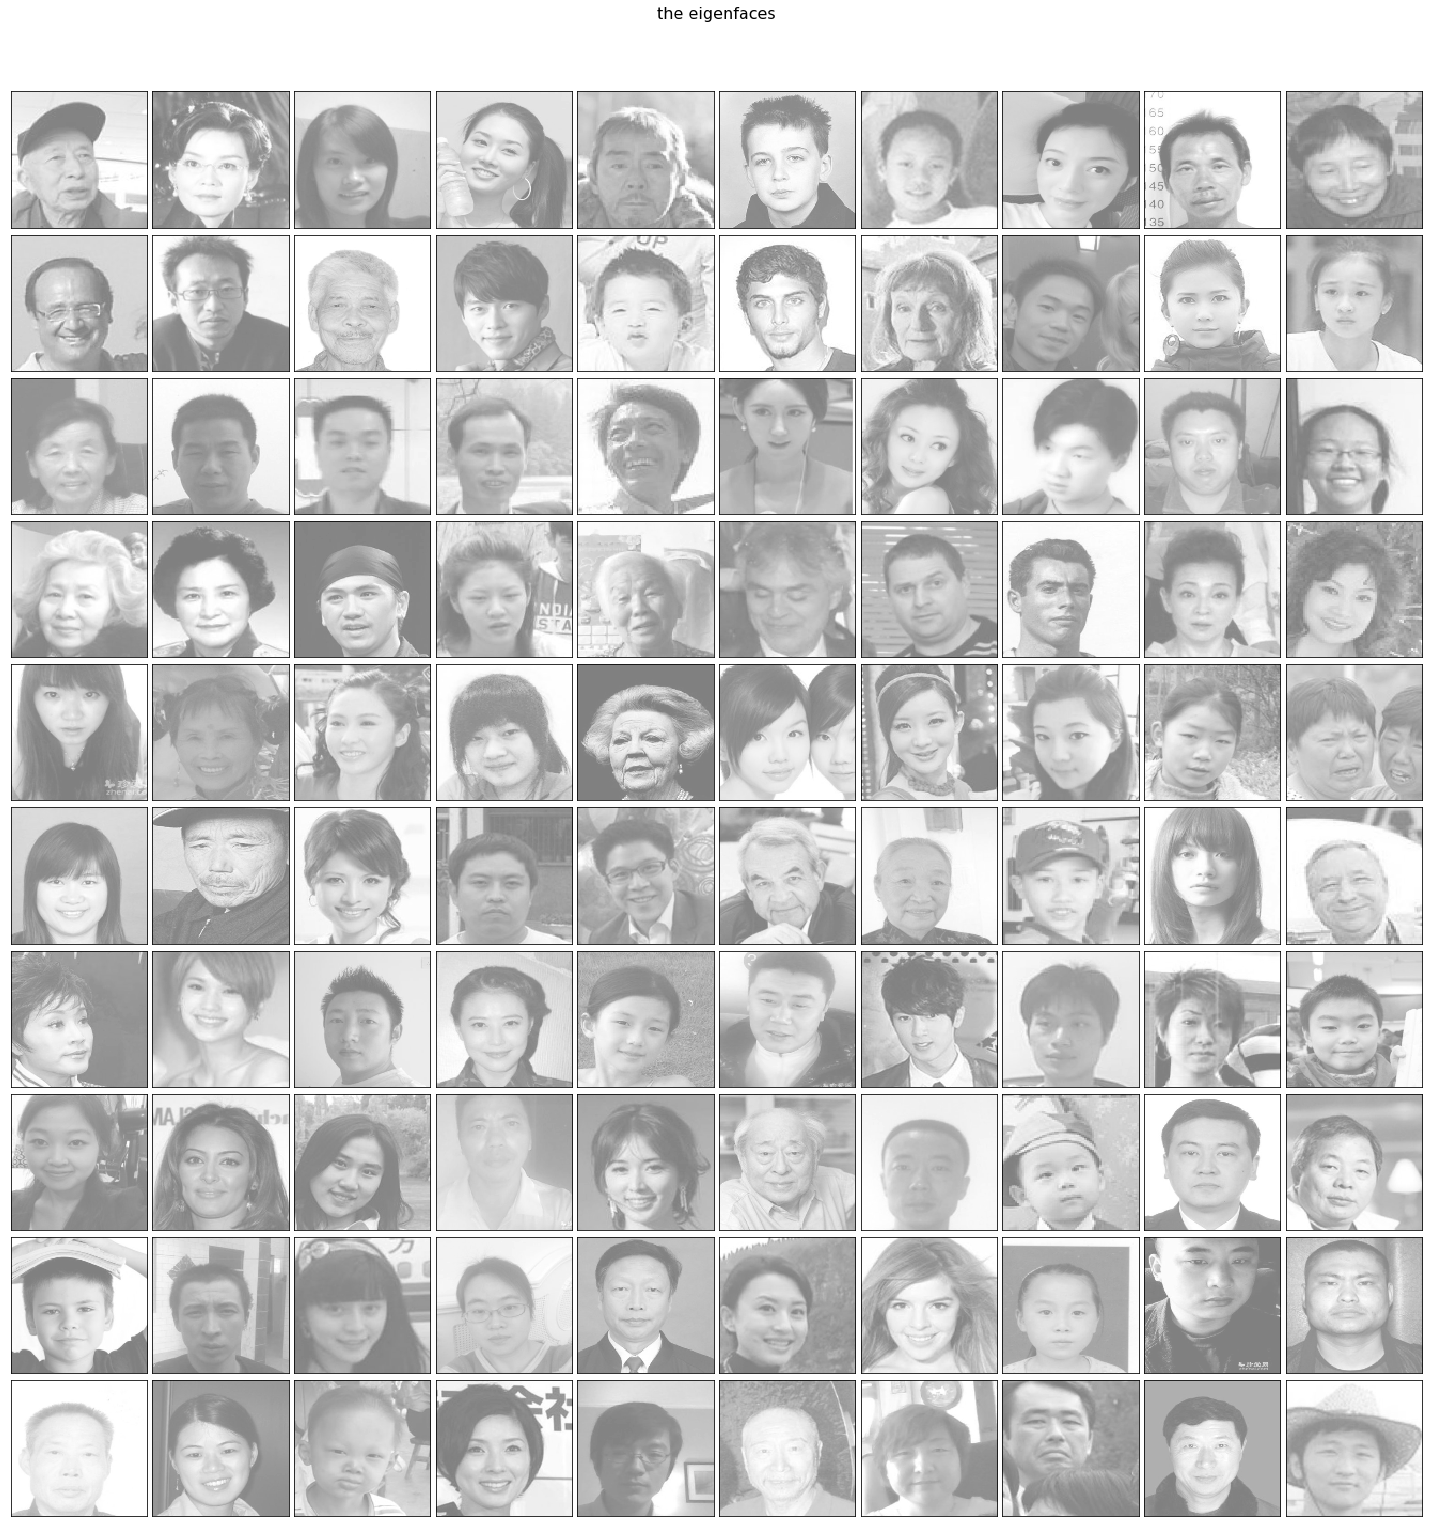

In [41]:
plot_gallery("the eigenfaces", X[:100], n_col=10, n_row=10)

### A Start in machine learning

#### PCA

In [31]:
df_faces.columns = ['pca'+str(x) for x in range(1 + 1)]+['Label']
df_faces

,pca0,pca1,Label
0,-28.903398,-11.455919,0.0
1,-13.390551,-5.204738,1.0
2,-21.024568,13.480628,1.0
3,-3.172932,-1.759127,0.0
4,-9.915375,11.287786,0.0
...,...,...,...
13317,20.559638,18.339125,1.0
13318,-6.764327,-8.836772,0.0
13319,5.829227,1.674455,0.0
13320,5.457259,0.108375,1.0


#### Non PCA

In [10]:
df_faces_no_pca.columns = ['Feature '+str(x) for x in range(16383 + 1)]+['Label']
df_faces_no_pca

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 16375,Feature 16376,Feature 16377,Feature 16378,Feature 16379,Feature 16380,Feature 16381,Feature 16382,Feature 16383,Label
0,0.426396,0.426945,0.427415,0.427240,0.427479,0.428104,0.427911,0.427109,0.427260,0.427682,...,0.094320,0.128038,0.164891,0.147358,0.129970,0.182504,0.180447,0.000852,-0.204941,0.0
1,-0.248114,-0.310310,-0.329447,-0.321780,-0.313697,-0.297386,-0.289736,-0.298382,-0.309995,-0.309573,...,-0.054699,-0.060198,-0.058638,-0.064407,-0.066108,-0.068476,-0.054847,-0.050128,-0.040235,1.0
2,-0.314781,-0.318153,-0.329447,-0.337466,-0.348991,-0.340524,-0.352481,-0.365048,-0.372740,-0.376239,...,-0.109601,-0.099413,-0.093932,-0.103622,-0.117088,-0.123378,-0.121513,-0.124638,-0.106902,1.0
3,-0.232428,-0.231879,-0.239251,-0.239427,-0.247031,-0.254249,-0.254442,-0.255244,-0.262936,-0.270357,...,0.294320,0.288822,0.298225,0.288535,0.286833,0.284465,0.278487,0.267519,0.265647,0.0
4,0.300905,0.285768,0.274474,0.274298,0.274538,0.275163,0.263205,0.282011,0.278241,0.294349,...,0.494320,0.480979,0.486460,0.480692,0.482912,0.472700,0.490251,0.487126,0.485255,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13317,0.395023,0.391651,0.392121,0.384102,0.384342,0.388888,0.388696,0.399658,0.399809,0.400231,...,-0.125287,-0.064119,-0.082167,-0.099701,-0.175912,0.045249,0.211820,0.298891,0.351922,1.0
13318,0.038160,0.023023,0.019572,0.035083,0.023558,0.020261,0.027911,0.031030,0.015496,0.008075,...,0.078634,0.167253,0.286460,0.178731,0.063304,0.288386,0.329467,0.322421,0.304863,0.0
13319,0.242082,0.230867,0.243102,0.242926,0.227479,0.235947,0.263205,0.262403,0.231182,0.219839,...,-0.105680,-0.087649,-0.090011,-0.111465,-0.152382,-0.154751,-0.172494,-0.195227,-0.208863,0.0
13320,-0.063800,-0.078937,-0.094153,-0.074721,-0.050952,0.075163,0.008304,-0.031715,-0.129603,-0.074278,...,-0.293915,-0.287649,-0.286089,-0.272250,-0.246500,-0.237104,-0.223474,-0.222678,-0.220627,1.0


### More Visualisations

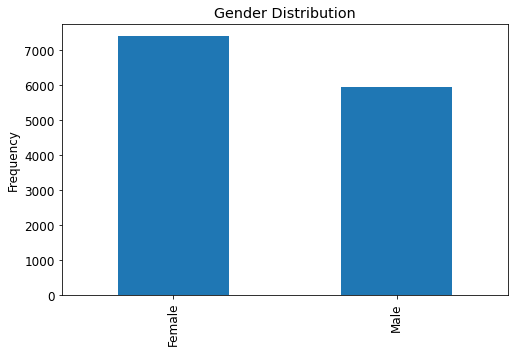

In [45]:
plt.rcParams.update({'font.size': 12, 'figure.figsize': (8, 5)})
plt.ylabel('Frequency')
df_faces['Label'].value_counts().plot(kind="bar", title='Gender Distribution');
positions = (0, 1)
labels = ("Female", "Male")
plt.xticks(positions, labels)
plt.savefig("Class imba")

<Figure size 432x288 with 0 Axes>

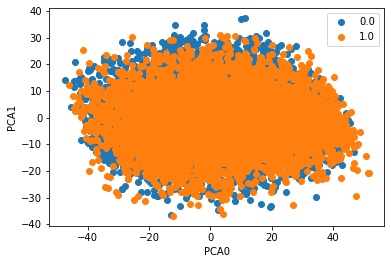

In [34]:
# Task 1.4.6 - a colour coded scatter plot according to class (also for for sepal length vs sepal width)
fig = plt.figure();
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

# group the data instances according to the different classes they belong to
groups = df_faces.groupby('Label')

# iterate over each group and plot (scatter)
for name, group in groups:
    ax.plot(group.pca0, group.pca1, marker='.', linestyle='', ms=12, label=name)

# set labels for the y and x axes
ax.set_xlabel('PCA0')
ax.set_ylabel('PCA1')

# add legend to the figure
ax.legend()

#### PCA

In [112]:
train_set, test_set = train_test_split(df_faces, test_size=0.2, random_state=42)

#### Non PCA

In [11]:
train_set, test_set = train_test_split(df_faces_no_pca, test_size=0.2, random_state=42)

### Train and test set

In [12]:
X_train =np.array(train_set.drop(columns=['Label']))
X_test =np.array(test_set.drop(columns=['Label']))

In [13]:
y_train = np.transpose(np.array(train_set['Label']))
y_test = np.transpose(np.array(test_set['Label']))

In [14]:
X_train.shape

(10657, 16384)

In [15]:
y_train.shape

(10657,)

## Grid Search

### Report Function

In [68]:
def report(results, rank_metric='score', n_top=3):
    """
    Utility function to report best scores.
    :param results: the cv_results_ data structure from the optimisation algorithm
    :param rank_metric: name of the metric to report results for
    :param n_top: the number of top results to report
    """
    print("\nModels ranked according to", rank_metric)
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_" + rank_metric] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.2f} (+/- {1:.2f})".format(
                  results["mean_test_" + rank_metric][candidate],
                  results["std_test_" + rank_metric][candidate]*2))
            print("Params: {0}".format(results['params'][candidate]))
            print("")

### Random Forest

In [80]:
# instantiating the model
model = RandomForestClassifier()

# defining parameter grid
param_grid = {"max_depth": [2, 4, 6, 8, None],
              "n_estimators": [50, 100],
              "min_samples_split": [2, 4, 6, 8, 10],
              "criterion": ["gini", "entropy"]}

# run grid search
print("\n> STARTING GRID SEARCH ...")
n_folds = 10
grid_search = GridSearchCV(model, param_grid=param_grid, cv=n_folds)

start_time = time()
grid_search.fit(X_train, y_train)
end_time = time()

print(type(grid_search))

print("> GRID SEARCH COMPLETE")

print("\nGridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (end_time - start_time, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)


> STARTING GRID SEARCH ...
<class 'sklearn.model_selection._search.GridSearchCV'>
> GRID SEARCH COMPLETE

GridSearchCV took 3818.25 seconds for 100 candidate parameter settings.

Models ranked according to score
Model with rank: 1
Mean validation score: 0.73 (+/- 0.03)
Params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 4, 'n_estimators': 100}

Model with rank: 2
Mean validation score: 0.73 (+/- 0.04)
Params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 8, 'n_estimators': 100}

Model with rank: 3
Mean validation score: 0.73 (+/- 0.04)
Params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 6, 'n_estimators': 100}



### KNN

In [76]:
model = KNeighborsClassifier()

# defining parameter grid
param_grid = {"n_neighbors": [3, 5, 8, 10],
              "metric": ["euclidean", "manhattan", "chebyshev", "minkowski"]}

# run grid search
print("\n> STARTING GRID SEARCH ...")
n_folds = 10
grid_search = GridSearchCV(model, param_grid=param_grid, cv=n_folds)

start_time = time()
grid_search.fit(X_train, y_train)
end_time = time()

print(type(grid_search))

print("> GRID SEARCH COMPLETE")

print("\nGridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (end_time - start_time, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)


> STARTING GRID SEARCH ...
<class 'sklearn.model_selection._search.GridSearchCV'>
> GRID SEARCH COMPLETE

GridSearchCV took 87.63 seconds for 16 candidate parameter settings.

Models ranked according to score
Model with rank: 1
Mean validation score: 0.68 (+/- 0.02)
Params: {'metric': 'euclidean', 'n_neighbors': 10}

Model with rank: 1
Mean validation score: 0.68 (+/- 0.02)
Params: {'metric': 'minkowski', 'n_neighbors': 10}

Model with rank: 3
Mean validation score: 0.68 (+/- 0.02)
Params: {'metric': 'euclidean', 'n_neighbors': 8}

Model with rank: 3
Mean validation score: 0.68 (+/- 0.02)
Params: {'metric': 'minkowski', 'n_neighbors': 8}



### SVM

In [78]:
model = SVC()

# defining parameter grid
param_grid = {"gamma": [0.1, 1, 10, 100],
              "kernel": ["linear", "poly", "rbf", "sigmoid"]}
# run grid search
print("\n> STARTING GRID SEARCH ...")
n_folds = 10
grid_search = GridSearchCV(model, param_grid=param_grid, cv=n_folds)

start_time = time()
grid_search.fit(X_train, y_train)
end_time = time()

print(type(grid_search))

print("> GRID SEARCH COMPLETE")

print("\nGridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (end_time - start_time, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)


> STARTING GRID SEARCH ...
<class 'sklearn.model_selection._search.GridSearchCV'>
> GRID SEARCH COMPLETE

GridSearchCV took 1333.31 seconds for 16 candidate parameter settings.

Models ranked according to score
Model with rank: 1
Mean validation score: 0.76 (+/- 0.03)
Params: {'gamma': 100, 'kernel': 'rbf'}

Model with rank: 2
Mean validation score: 0.74 (+/- 0.03)
Params: {'gamma': 10, 'kernel': 'rbf'}

Model with rank: 3
Mean validation score: 0.73 (+/- 0.04)
Params: {'gamma': 100, 'kernel': 'poly'}



## Training

In [27]:

#The dataset
df_test = df_faces



# Splits the Pandas DataFrame into a feature matrix (X) and class/label vector (y)
X = df_test.iloc[:,:len(df_test.columns)-1]
y = df_test.iloc[:,len(df_test.columns)-1]

# Transform class labels to numeric labels
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

In [119]:

print("Training..\n")
# Instantiating model
#model =  SVC(random_state=42, gamma="auto", kernel='rbf')
#model = RandomForestClassifier(random_state=42, n_estimators=100, criterion="entropy", min_samples_split=4, max_depth=None)
model = KNeighborsClassifier(n_neighbors=10, metric='euclidean')

model.fit(X_train, y_train)

#Scores
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

start_time = time()

# 10-fold cross validation
scores = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)
end_time = time()

print("Accuracy (Testing):  %0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
print("Precision (Testing):  %0.2f (+/- %0.2f)" % (scores['test_precision'].mean(), scores['test_precision'].std() * 2))
print("Recall (Testing):  %0.2f (+/- %0.2f)" % (scores['test_recall'].mean(), scores['test_recall'].std() * 2))
print("F1-Score (Testing):  %0.2f (+/- %0.2f)" % (scores['test_f1_score'].mean(), scores['test_f1_score'].std() * 2))
#print(scores['train_accuracy'])
y_train_pred = cross_val_predict(model, X_train, y_train, cv=10)
print("Time taken: %0.2f" % (end_time - start_time))
confusion_matrix(y_train, y_train_pred, labels=[1, 0])

Training..

Accuracy (Testing):  0.68 (+/- 0.01)
Precision (Testing):  0.63 (+/- 0.02)
Recall (Testing):  0.69 (+/- 0.04)
F1-Score (Testing):  0.66 (+/- 0.02)
Time taken: 2.68


array([[3277, 1465],
       [1923, 3992]], dtype=int64)

In [45]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)  

### Roc curve SVC

In [46]:
y_train_pred = cross_val_predict(svc_model, X_train, y_train, cv=10, method="decision_function")
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

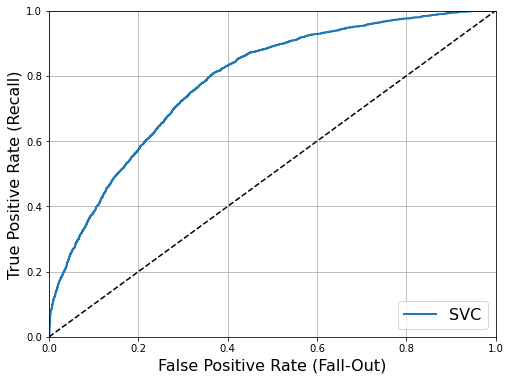

In [47]:
plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr, "SVC")
plt.legend(loc="lower right", fontsize=16)

### Roc Curve RF

In [50]:
y_probas_forest = cross_val_predict(rf_model, X_train, y_train, cv=10, method="predict_proba")

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)

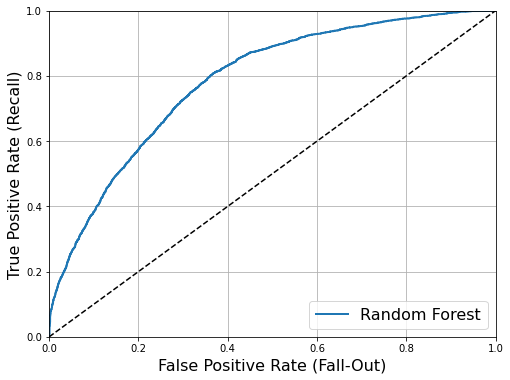

In [51]:
plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr, "Random Forest")
plt.legend(loc="lower right", fontsize=16)

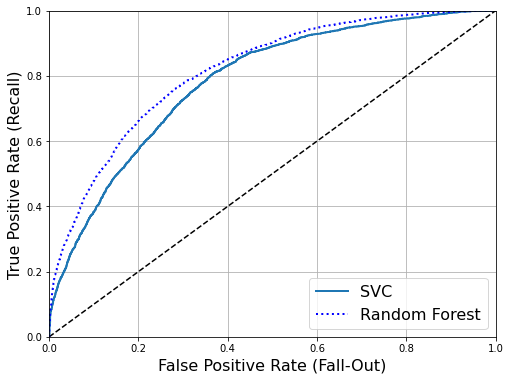

In [54]:
plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr, "SVC")
plt.plot(fpr_forest, tpr_forest, "b:", linewidth=2, label="Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.savefig("roc")

## Dask

### Import

In [2]:
from dask.distributed import LocalCluster
cluster = LocalCluster()
cluster

In [3]:
from dask.distributed import Client

client = Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:54336 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 17.07 GB


In [18]:
import dask.dataframe

ddf = dask.dataframe.from_pandas(data=df_faces, npartitions=4)

In [ ]:
ddf

In [123]:
y = ddf.Label.to_dask_array(lengths=True)
y

dask.array<values, shape=(13322,), dtype=float64, chunksize=(3331,), chunktype=numpy.ndarray>

In [124]:
X = ddf.drop(columns=['Label']).to_dask_array(lengths=True)
X

dask.array<values, shape=(13322, 100), dtype=float64, chunksize=(3331, 100), chunktype=numpy.ndarray>

In [125]:
from dask_ml.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

dask.array<concatenate, shape=(10655, 100), dtype=float64, chunksize=(2664, 100), chunktype=numpy.ndarray>

In [126]:
from dask_ml.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Random Forest

In [133]:
import joblib

with joblib.parallel_backend('dask'):
    print("Training..\n")
    # Instantiating model
    model =  SVC(random_state=42, gamma="auto", kernel='rbf')
    #model = RandomForestClassifier(random_state=42, n_estimators=100, criterion="entropy", min_samples_split=4, max_depth=None)
    #model = KNeighborsClassifier(n_neighbors=10, metric='euclidean')

    model.fit(X_train_scaled, y_train)

    #Scores
    scoring = {'accuracy' : make_scorer(accuracy_score), 
               'precision' : make_scorer(precision_score),
               'recall' : make_scorer(recall_score), 
               'f1_score' : make_scorer(f1_score)}

    start_time = time()

    # 10-fold cross validation
    scores = cross_validate(model, X_train_scaled, y_train, cv=10, scoring=scoring)
    end_time = time()

    print("Accuracy (Testing):  %0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
    print("Precision (Testing):  %0.2f (+/- %0.2f)" % (scores['test_precision'].mean(), scores['test_precision'].std() * 2))
    print("Recall (Testing):  %0.2f (+/- %0.2f)" % (scores['test_recall'].mean(), scores['test_recall'].std() * 2))
    print("F1-Score (Testing):  %0.2f (+/- %0.2f)" % (scores['test_f1_score'].mean(), scores['test_f1_score'].std() * 2))

    print("\nTime taken: %0.2f \n" % (end_time - start_time))
    y_train_pred = cross_val_predict(model, X_train_scaled, y_train, cv=10)
    print(confusion_matrix(y_train, y_train_pred, labels=[1, 0]))

Training..



distributed.scheduler - ERROR - Couldn't gather keys {"('getitem-cbed0ba1092fbb1cf03f66da74eedbe3', 0)": []} state: [None] workers: []
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: [], ('getitem-cbed0ba1092fbb1cf03f66da74eedbe3', 0)
NoneType: None


Accuracy (Testing):  0.77 (+/- 0.02)
Precision (Testing):  0.75 (+/- 0.03)
Recall (Testing):  0.73 (+/- 0.03)
F1-Score (Testing):  0.74 (+/- 0.02)

Time taken: 56.69 

[[3483 1266]
 [1162 4744]]


### Confusion Matrix

In [129]:
import joblib

with joblib.parallel_backend('dask'):
    print("Training..\n")
    y_train_pred = cross_val_predict(model, X_train_scaled, y_train, cv=10) 
    print(confusion_matrix(y_train, y_train_pred, labels=[1, 0]))

Training..

[[3521 1228]
 [2266 3640]]


### SVM

## Keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

In [ ]:
X = np.array(X)
y = np.array(y)

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=3, validation_split=0.1)

In [ ]:
X.shape[0:]